## P9.2.1
-----

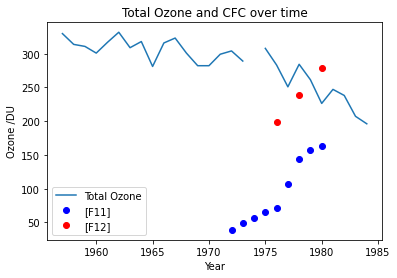

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    filepath_or_buffer="C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/ozone.csv"
)

df.head()

# Now there probably is a better way to visualize the data, but I"m not a climate scientist so i"ll just do this.
plt.plot(df["Year"], df["Total Ozone /DU"])
plt.plot(df["Year"], df["[F11] /pptv"], "bo")
plt.plot(df["Year"], df["[F12] /pptv"], "ro")
plt.legend(["Total Ozone", "[F11]", "[F12]"])
plt.xlabel("Year")
plt.ylabel("Ozone /DU")
plt.title("Total Ozone and CFC over time")

plt.show()


## P9.2.2
-----

C:\Users\Arjun Sarao\AppData\Local\Temp\ipykernel_68308\4092772051.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace("*", "")


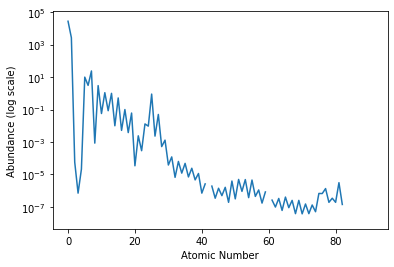

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_html(
    io="https://en.wikipedia.org/wiki/Abundances_of_the_elements_(data_page)",
    match="Y1",
)[0]

df["Y1"] = (
    df["Y1"]
    .str.replace("×10", "e")
    .str.replace("*", "")
    .str.replace("−", "-")
    .astype(float)
)

plt.plot(df.index, df["Y1"])
plt.yscale("log")
plt.xlabel("Atomic Number")
plt.ylabel("Abundance (log scale)")

plt.show()


## P9.2.3
-----

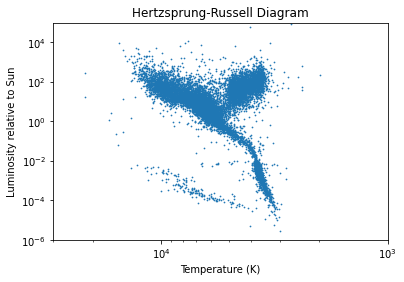

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    filepath_or_buffer="C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/hygdata_v3-abridged.csv"
)

df["T"] = 4600 * (1.0 / (0.92 * df["ci"] + 1.7) + 1.0 / (0.92 * df["ci"] + 0.62))

plt.scatter(df["T"], df["lum"], s=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlim(30000, 1000)
plt.ylim(1.0e-6, 1.0e5)
plt.title("Hertzsprung-Russell Diagram")
plt.xlabel("Temperature (K)")
plt.ylabel("Luminosity relative to Sun")

plt.show()


## P9.2.4
-----

In [35]:
import pandas as pd

df_dict = pd.read_excel(
    io="C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/multi-year-station-entry-and-exit-figures.xls",
    sheet_name=None,
    skiprows=6,
)

del df_dict["Notes"]
del df_dict["workings"]

# a) Find the busiest day in 2017.
df_dict["2017 Entry & Exit"].sort_values(by="Weekday", ascending=False, inplace=True)

print(
    f"The busiest station in 2017 was {df_dict['2017 Entry & Exit'].iloc[1]['Station']}"
)

# b) Find the station with the greatest percent increase.
df2017 = df_dict["2017 Entry & Exit"][df_dict["2017 Entry & Exit"]["nlc"].notna()]
df2007 = df_dict["2007 Entry & Exit"][df_dict["2007 Entry & Exit"]["nlc"].notna()]

df2017.index = df2017["Station"].str.strip()
df2007.index = df2007["Station"].str.strip()

annual_2007 = df2007["million"].rename("Annual 2007")
annual_2017 = df2017["million"].rename("Annual 2017")

df = pd.concat([annual_2007, annual_2017], axis=1)
df["% increase"] = (df["Annual 2017"] - df["Annual 2007"]) / df["Annual 2007"] * 100

df = pd.concat([annual_2007, annual_2017], axis=1)
df["% increase"] = (df["Annual 2017"] - df["Annual 2007"]) / df["Annual 2007"] * 100
station = df["% increase"].idxmax()

print(
    f"Station with the greatest percentage increase in passengers: {station} ({df['Annual 2007'][station]} million in 2007 vs. {df['Annual 2017'][station]} million in 2017, {df['% increase'][station]:+.1f}%"
)

# c) Find the station with the greatest difference between the weekdays and sunday riders in 2017.
df2017 = df_dict["2017 Entry & Exit"][df_dict["2017 Entry & Exit"]["nlc"].notna()]

df2017["Difference"] = df2017["Weekday"] - df2017["Sunday"]

station = df2017["Difference"].idxmax()

print(
    f"The station with the greatest difference between weekdays and sundays: {df2017.loc[station, 'Station']} ({df2017['Weekday'][station]} riders on weekdays vs. {df2017['Sunday'][station]} riders on sundays)"
)


The busiest station in 2017 was King's Cross St. Pancras
Station with the greatest percentage increase in passengers: Chesham (0.431532 million in 2007 vs. 1.133596 million in 2017, +162.7%
The station with the greatest difference between weekdays and sundays: Bank & Monument (112547.0 riders on weekdays vs. 17414.0 riders on sundays)


C:\Users\Arjun Sarao\AppData\Local\Temp\ipykernel_30388\3897783984.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2017["Difference"] = df2017["Weekday"] - df2017["Sunday"]


## P9.2.5
-----

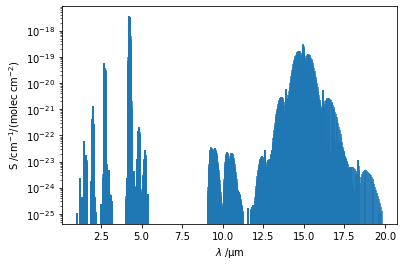

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_fwf(
    filepath_or_buffer="C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/CO2-transitions.par.txt",
    colspecs=[(3, 15), (15, 25)],
    header=None,
    names=["nu", "S"],
)
df["lambda /um"] = 1.0e4 / df["nu"]

plt.stem(df["lambda /um"], df["S"], use_line_collection=True, markerfmt="none")
plt.yscale("log")
plt.xlabel("$\lambda\;/\mathrm{\mu m}$")
plt.ylabel("S /$\mathrm{cm^{-1}/(molec\,cm^{-2})}$")
plt.show()
